# **Prédiction du diabète**



Ce document présente un guide complet pour l'analyse de l'ensemble de données sur le diabète et la mise en œuvre d'un modèle de classification pour la prédiction du diabète.
# **1. Description des données:**
L'ensemble de données sur le diabète contient plusieurs caractéristiques importantes pour prédire l'apparition du diabète :

**Pregnancies** : Le nombre de grossesses , lié au risque de diabète.

**Glucose** : La concentration de glucose dans le sang, indicateur de l'hyperglycémie associée au diabète.

**BloodPressure**: La pression artérielle diastolique, liée à l'hypertension, un facteur de risque pour le diabète.

**SkinThickness** : Mesure du pli cutané du triceps, indiquant le surpoids ou l'obésité, des facteurs de risque du diabète.

**Insulin** : Niveau d'insuline sérique, importante pour le métabolisme du glucose et les problèmes d'insuline sont liés au diabète.

**BMI** : L'indice de masse corporelle, un indicateur de surpoids ou d'obésité, associé au risque de diabète.

**DiabetesPedigreeFunction**: Évaluation de la probabilité de diabète basée sur les antécédents familiaux.

**Age** : L'âge de la personne, avec le vieillissement étant un facteur de risque pour le diabète.

**Outcome** : La variable cible indiquant la présence ou l'absence de diabète(1 pour OUI, 0 pour NON).




### **Importation des bibliothèques**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### **Chargement des données**

In [ ]:
import pandas as pd
data = pd.read_csv("/content/diabetes.csv")

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



# **2. Analyse exploratoire des données (AED)**



---



In [ ]:
#Les dimensions du dataframe
data.shape

(768, 9)

In [ ]:
# Affiche le nombre de lignes dupliquées
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 9)


In [ ]:
# Afficher les informations sur le jeu de données
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Remplacer les zéros par NaN, car après cela, les compter serait plus facile, et les zéros doivent être remplacés par des valeurs appropriées.

In [ ]:
# Créer une copie profonde (deep copy) des données originales pour éviter toute modification des données d'origine
diabetes_data_copy = data.copy(deep=True)

# Remplacer les valeurs égales à zéro dans les colonnes 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' et 'BMI' par NaN
diabetes_data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

# Afficher le nombre de valeurs manquantes (NaN) dans chaque colonne
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


## **Remplir les valeurs manquantes avec la moyenne des valeurs existantes**

In [ ]:
# Remplir les valeurs manquantes dans la colonne 'Glucose' avec la moyenne des valeurs existantes
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace=True)

# Remplir les valeurs manquantes dans la colonne 'BloodPressure' avec la moyenne des valeurs existantes
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace=True)

# Remplir les valeurs manquantes dans la colonne 'SkinThickness' avec la médiane des valeurs existantes
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace=True)

# Remplir les valeurs manquantes dans la colonne 'Insulin' avec la médiane des valeurs existantes
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace=True)

# Remplir les valeurs manquantes dans la colonne 'BMI' avec la médiane des valeurs existantes
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace=True)


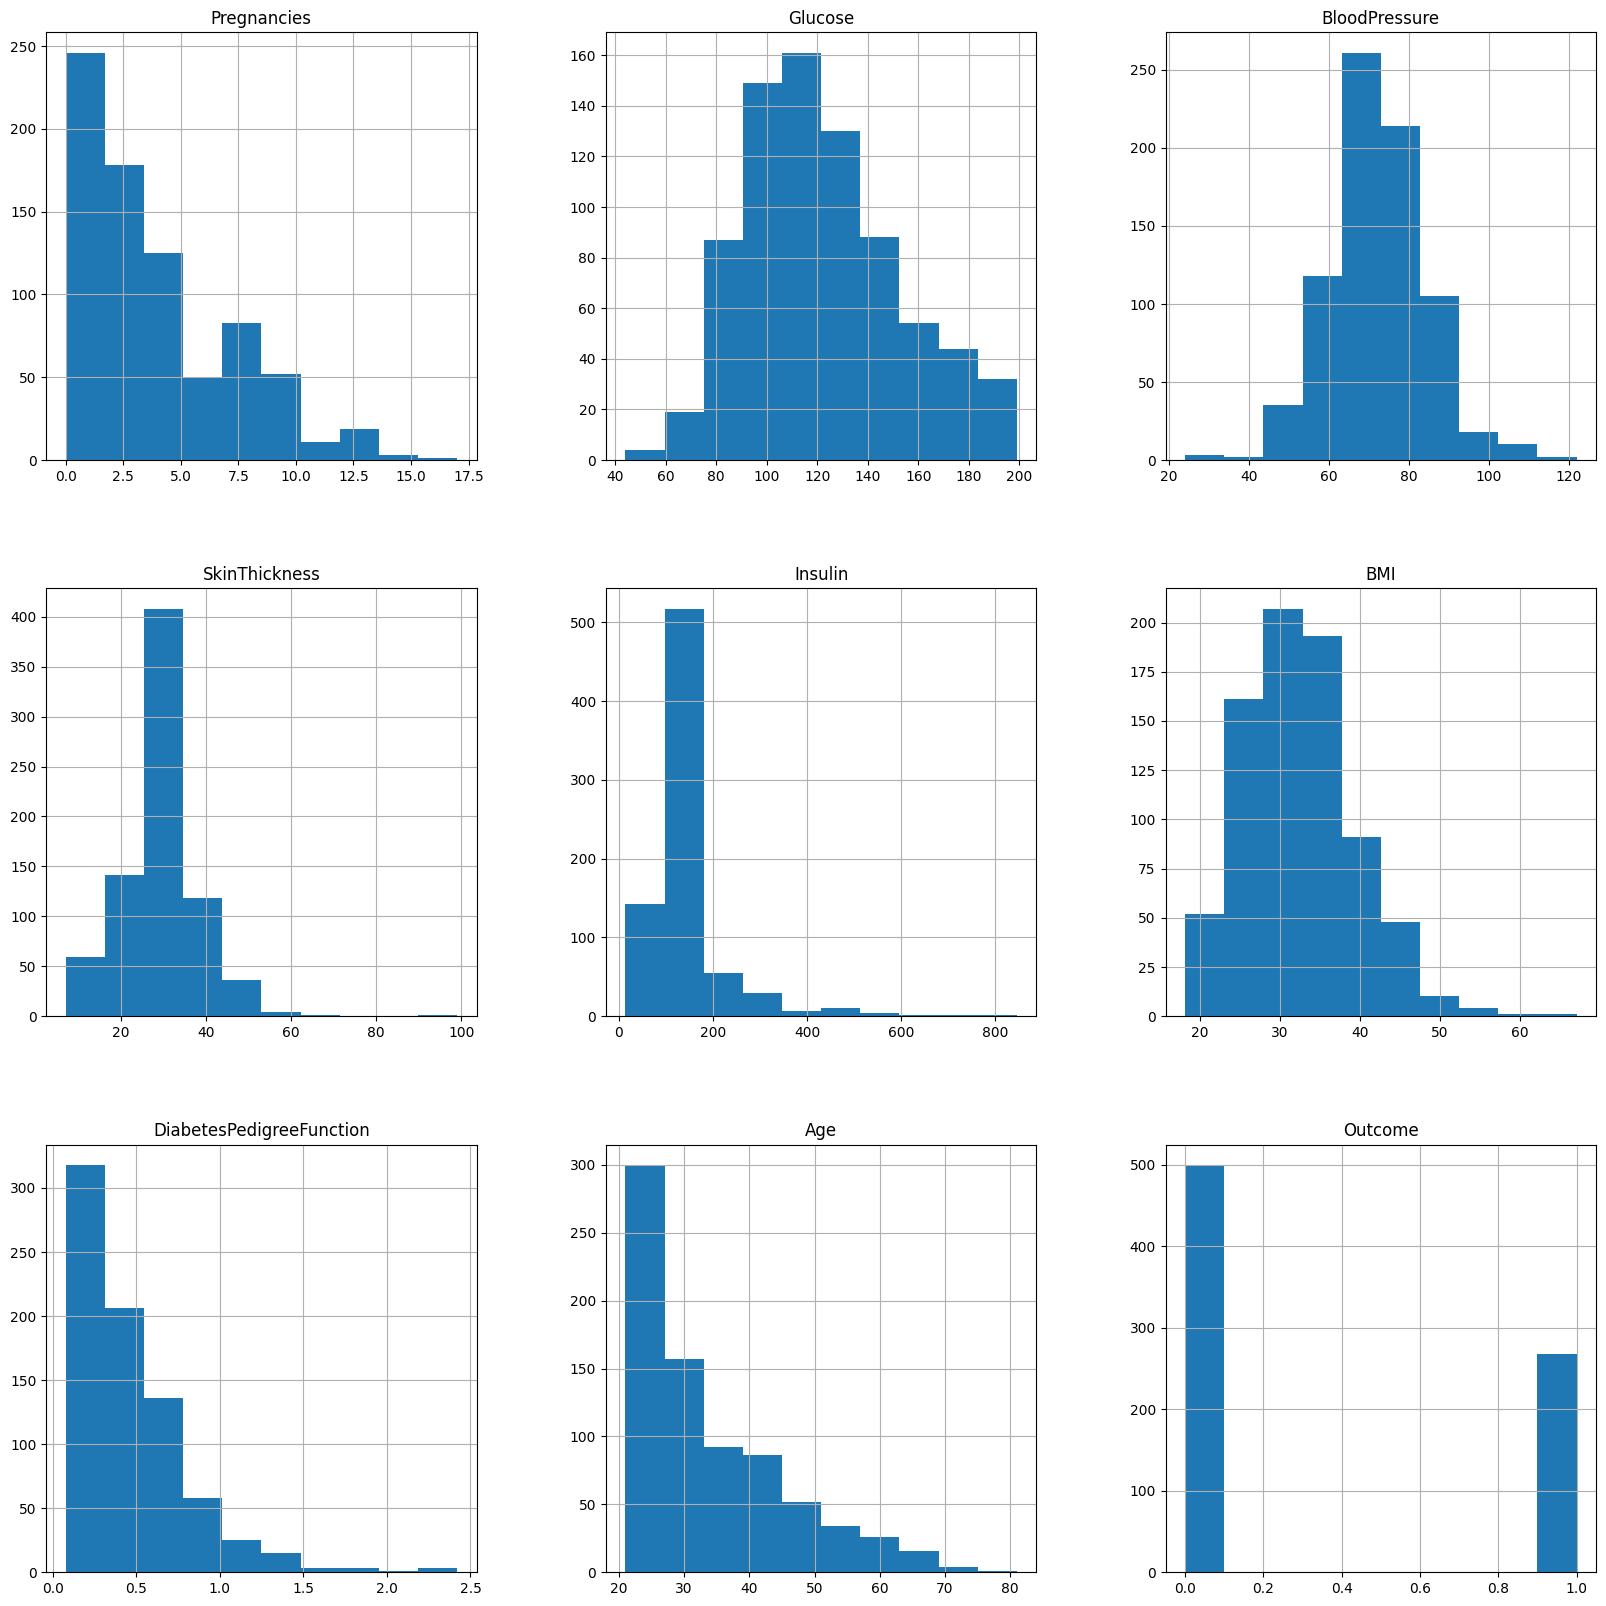

In [ ]:
p = diabetes_data_copy.hist(figsize = (20,20))

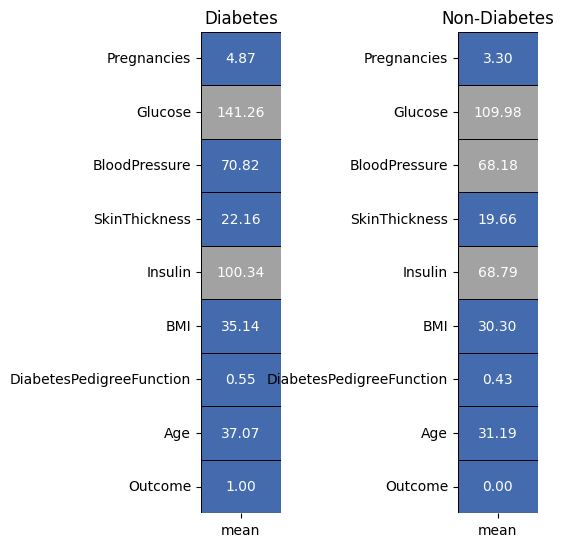

In [ ]:
# Définir les couleurs pour les heatmap
couleurs = ['#446BAD','#A2A2A2']

# Obtenir les statistiques descriptives pour les groupes diabète et non-diabète
diabete = data[data['Outcome'] == 1].describe().T
non_diabete = data[data['Outcome'] == 0].describe().T

# Créer une figure avec des sous-graphiques
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5,5))

# Tracer la heatmap pour le groupe diabète
plt.subplot(1,2,1)
sns.heatmap(diabete[['mean']], annot=True, cmap=couleurs, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Diabète')

# Tracer la heatmap pour le groupe non-diabète
plt.subplot(1,2,2)
sns.heatmap(non_diabete[['mean']], annot=True, cmap=couleurs, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Non-Diabète')

# Ajuster la mise en page pour la rendre plus compacte
fig.tight_layout(pad=-1)


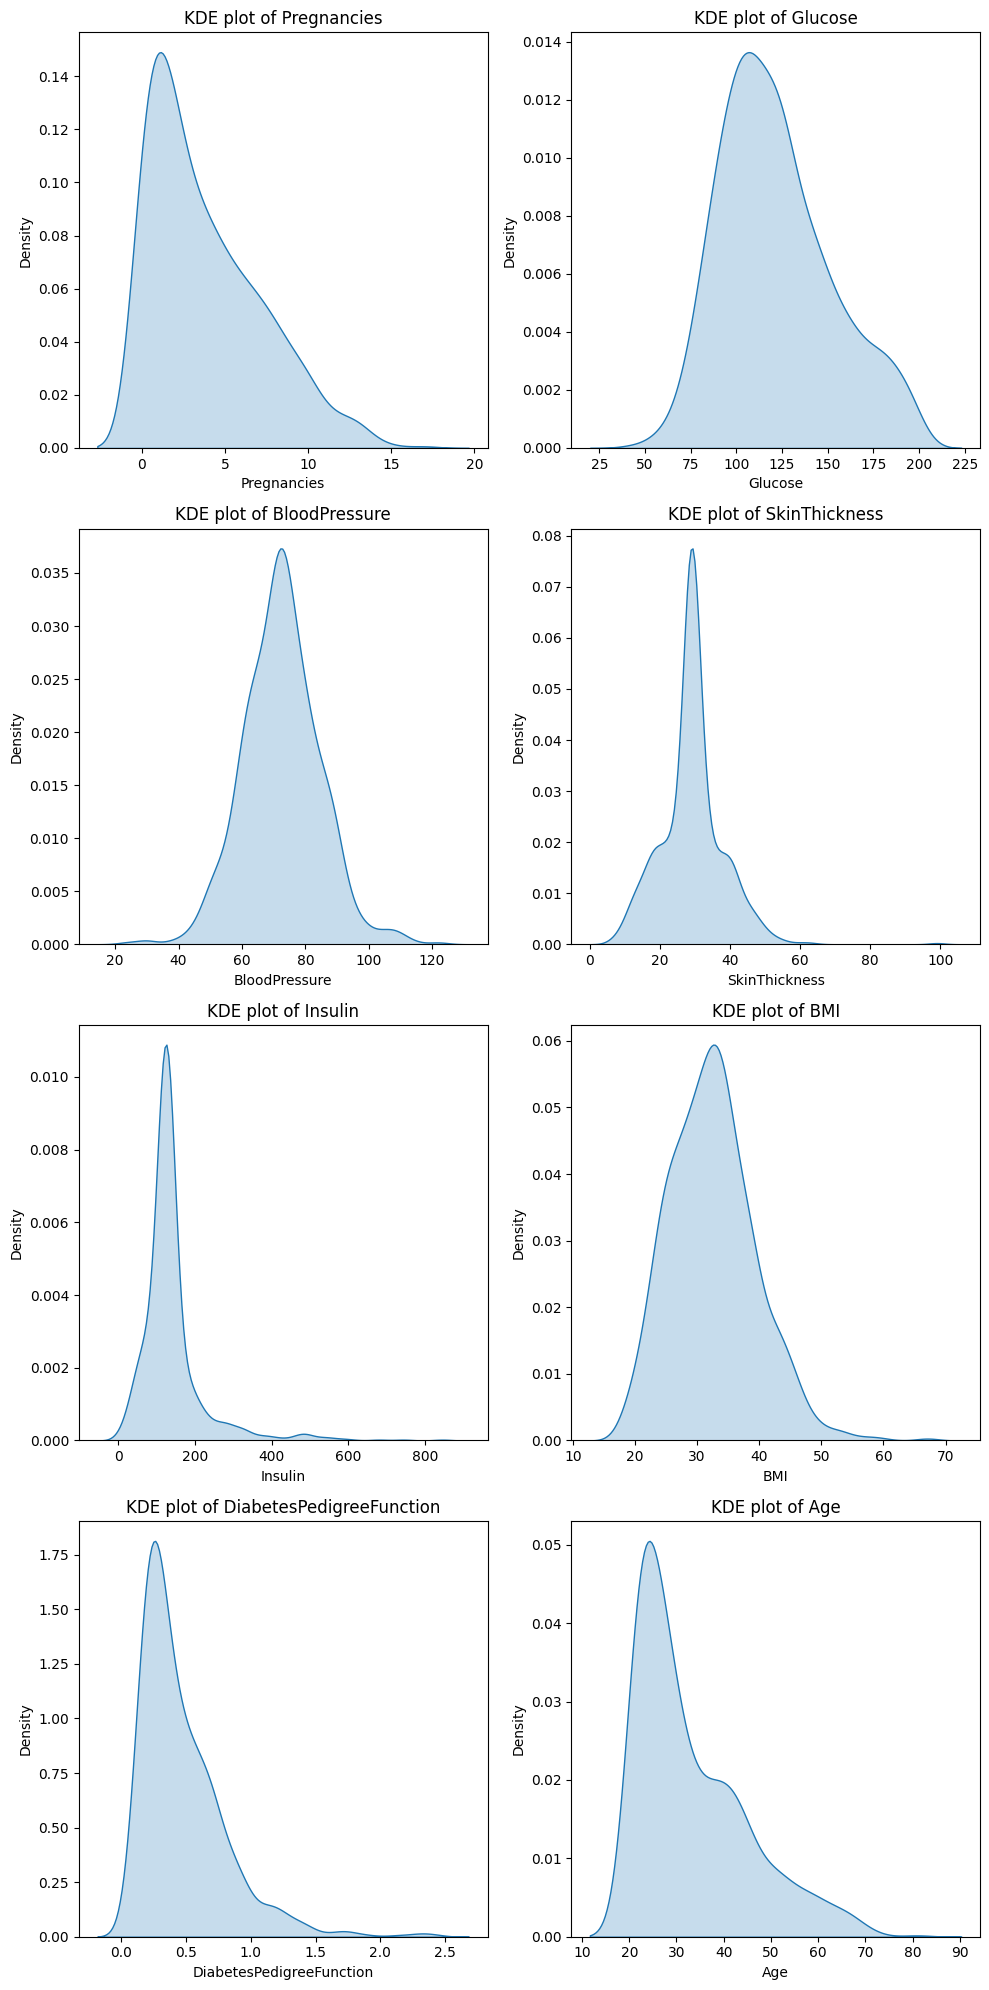

In [ ]:
# Tracés d'estimation de la densité du noyau (KDE) pour chaque variable
num_columns = len(diabetes_data_copy.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(diabetes_data_copy.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=diabetes_data_copy[column], fill=True)
    plt.title(f'KDE plot of {column}')

plt.tight_layout()
plt.show()

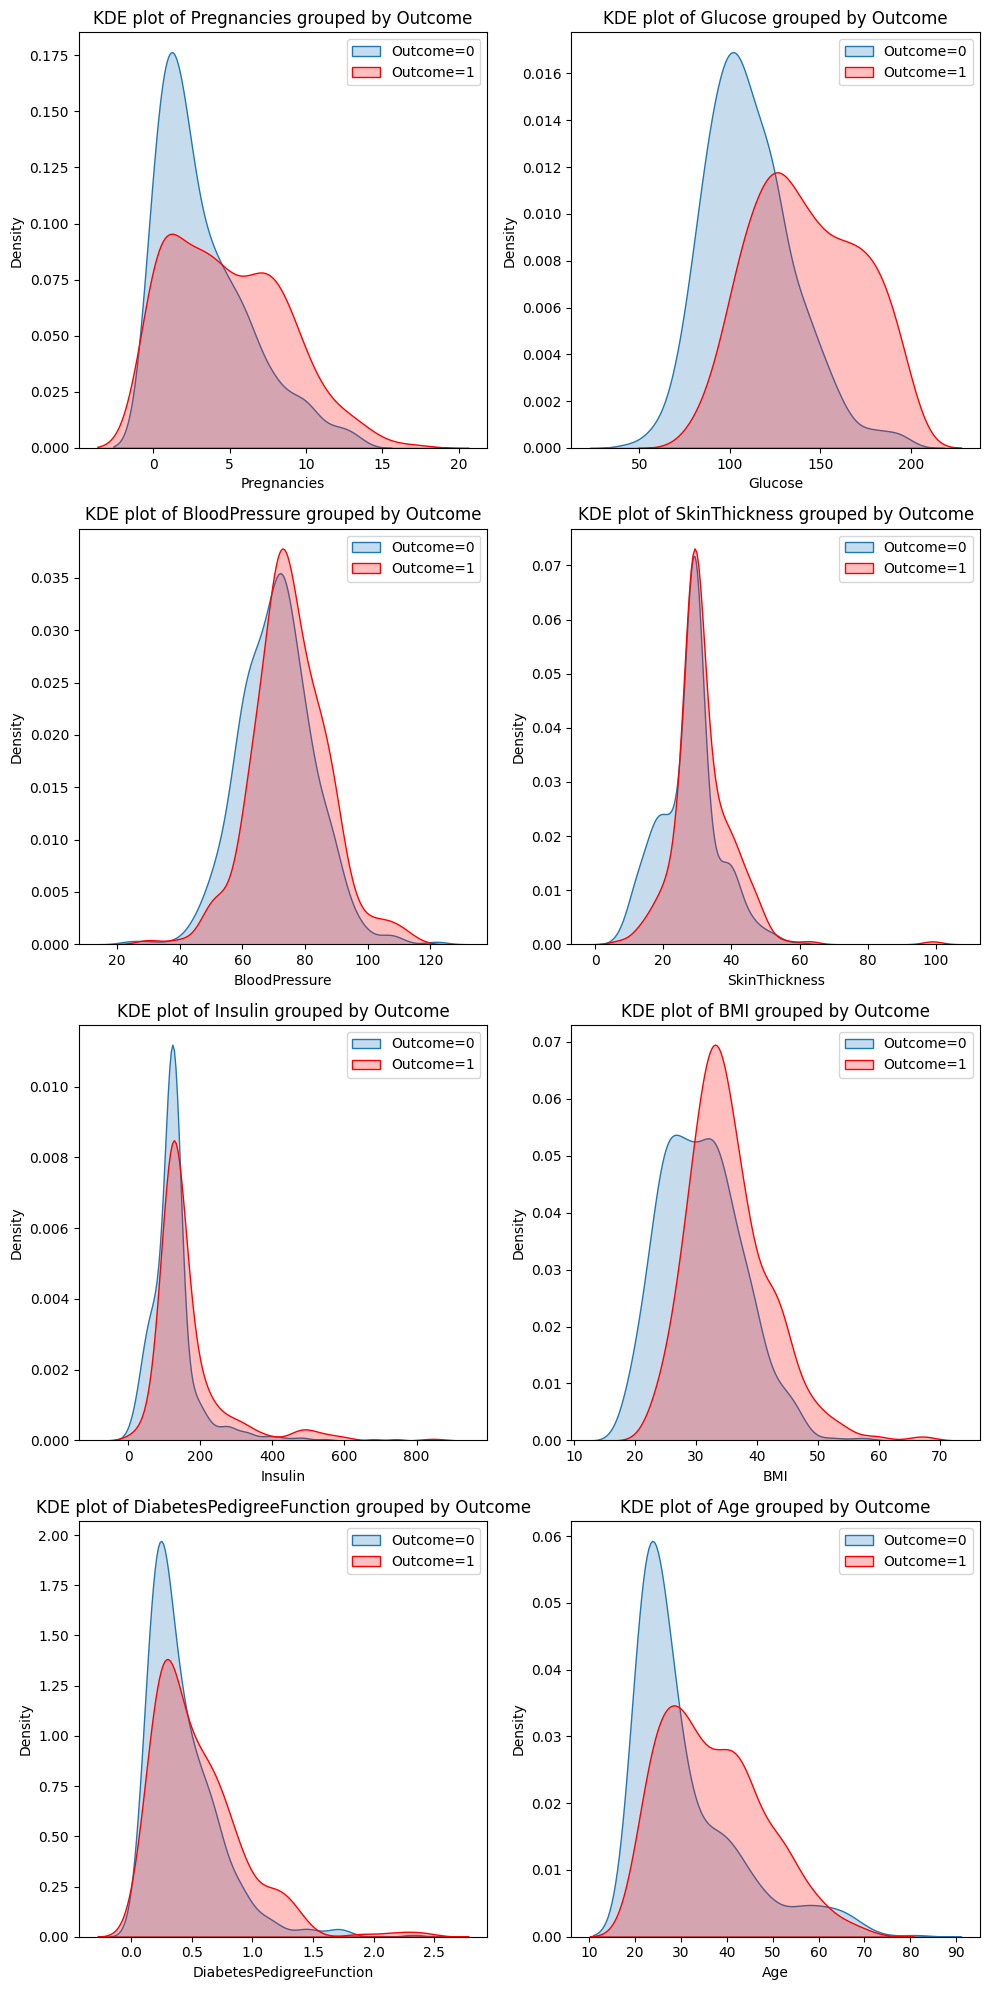

In [ ]:
# Tracés KDE (estimation de densité du noyau) pour chaque variable regroupés par le résultat (Outcome)
num_columns = len(diabetes_data_copy.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(diabetes_data_copy.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=diabetes_data_copy[diabetes_data_copy['Outcome']==0][column], label='Outcome=0', fill=True)
    sns.kdeplot(data=diabetes_data_copy[diabetes_data_copy['Outcome']==1][column], label='Outcome=1', fill=True,color='red')
    plt.title(f'KDE plot of {column} grouped by Outcome')
    plt.legend()

plt.tight_layout()
plt.show()

Outcome
0    500
1    268
Name: count, dtype: int64


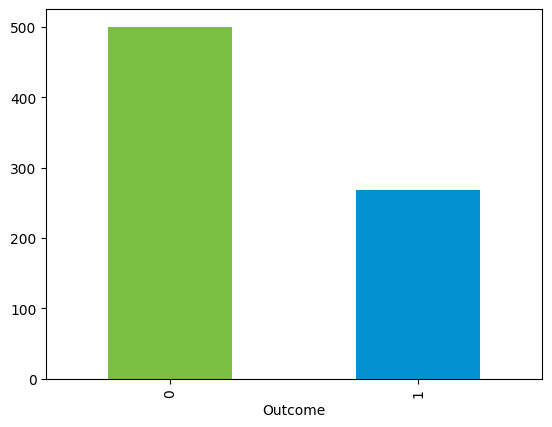

In [ ]:
# Définir une roue de couleurs pour les catégories de résultats (1 et 2)
color_wheel = {1: "#0392cf",  # Couleur pour la catégorie 1
               2: "#7bc043"}  # Couleur pour la catégorie 2

# Mapper les couleurs en fonction des catégories de résultats dans la colonne "Outcome"
colors = diabetes_data_copy["Outcome"].map(lambda x: color_wheel.get(x + 1))

# Afficher le décompte des valeurs de la colonne "Outcome"
print(data.Outcome.value_counts())

# Créer un graphique à barres montrant le décompte des valeurs de la colonne "Outcome"
p = data.Outcome.value_counts().plot(kind="bar", color=colors)


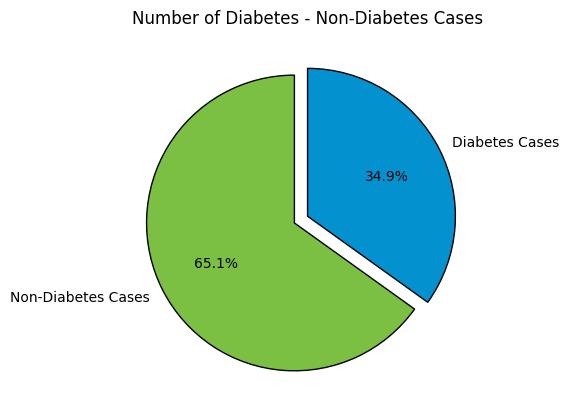

In [ ]:
#Répartition des cas de Diabète et de Non-Diabète
l = list(diabetes_data_copy['Outcome'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]


plt.pie(circle,labels = ['Non-Diabetes Cases','Diabetes Cases'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Diabetes - Non-Diabetes Case %');



plt.title('Number of Diabetes - Non-Diabetes Cases');
plt.show()


Les caractéristiques numériques et leurs plages de valeurs :

Pregnancies : 7 - 10

Glucose : 125+

BloodPressure : 60 - 100

SkinThickness : 20 - 50

Insulin : 0 - 300

BMI : 20 - 50

DiabetesPedigreeFunction : 0 - 1.5

Age : 20 - 50

# **3. Ingénierie des caractéristiques(features)**

## **Matrice de Correlation**

<Axes: >

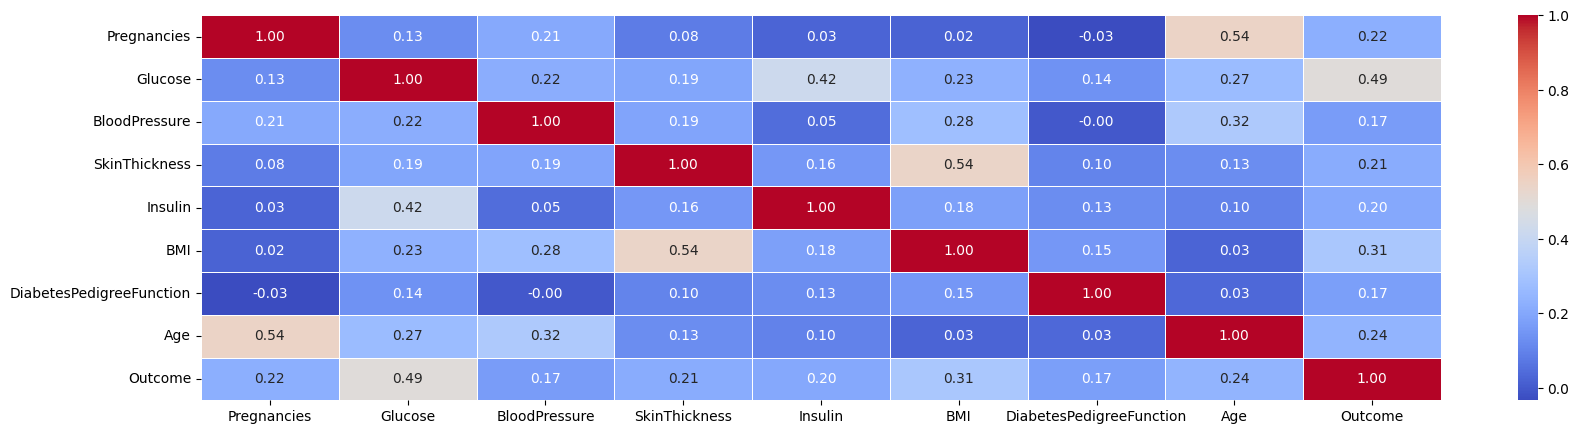

In [ ]:
plt.figure(figsize = (20,5))
sns.heatmap(diabetes_data_copy.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

### **Correlation with Diabetes**

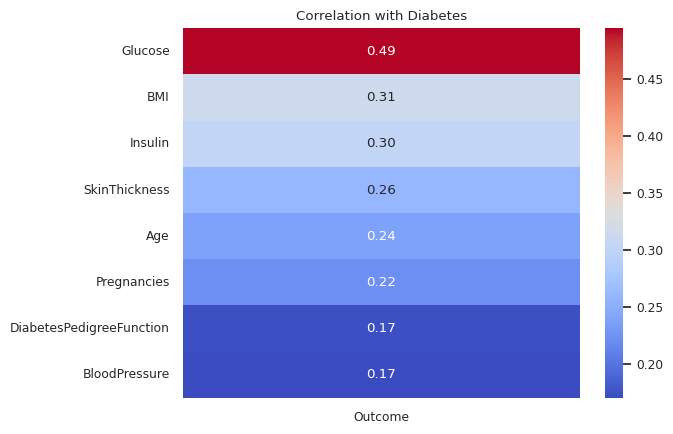

In [ ]:
corr = diabetes_data_copy.corr()
target_corr = corr['Outcome'].drop('Outcome')

# Trier les valeurs de corrélation par ordre décroissant
target_corr_sorted = target_corr.sort_values(ascending=False)

# Créer une heatmap des corrélations avec la colonne cible
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

## **Normalisation des caractéristiques (features)**

In [ ]:
# Importer la classe StandardScaler depuis scikit-learn
from sklearn.preprocessing import StandardScaler

# Initialiser un objet StandardScaler
sc_X = StandardScaler()

# Normaliser les caractéristiques (features) en utilisant StandardScaler
# La méthode fit_transform() ajuste les paramètres de la normalisation sur les données et les transforme
# Les colonnes sont renommées selon les noms d'origine pour faciliter la compréhension
X = pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"], axis=1)),
                 columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                          'BMI', 'DiabetesPedigreeFunction', 'Age'])

# Extraire la colonne "Outcome" pour la cible de prédiction y
y = diabetes_data_copy.Outcome

# Afficher les premières lignes du dataframe X après normalisation
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


## **Division des données en ensembles d'entraînement et de test**

In [ ]:
from sklearn.model_selection import train_test_split
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

### **Importance des Caractéristiques**

# **4.Modélisation**

# **KNN**

## **Évaluation de la performance du classificateur k-NN avec différentes valeurs de k**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialisation des listes pour stocker les scores d'entraînement et de test
test_scores = []
train_scores = []

# Boucle sur différentes valeurs de k (nombre de voisins)
for i in range(1, 15):
    # Initialisation du classificateur KNN avec k voisins
    knn = KNeighborsClassifier(i)

    # Entraînement du classificateur sur les données d'entraînement
    knn.fit(X_train, y_train)

    # Ajout du score d'entraînement à la liste
    train_scores.append(knn.score(X_train, y_train))

    # Ajout du score de test à la liste
    test_scores.append(knn.score(X_test, y_test))


In [ ]:
# Recherche du score d'entraînement maximal et de son index
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]

# Affichage du score d'entraînement maximal et des valeurs de k correspondantes
print('Score d\'entraînement maximal {} % et k = {}'.format(max_train_score*100, list(map(lambda x: x+1, train_scores_ind))))


Score d'entraînement maximal 100.0 % et k = [1]


In [ ]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k = [11]


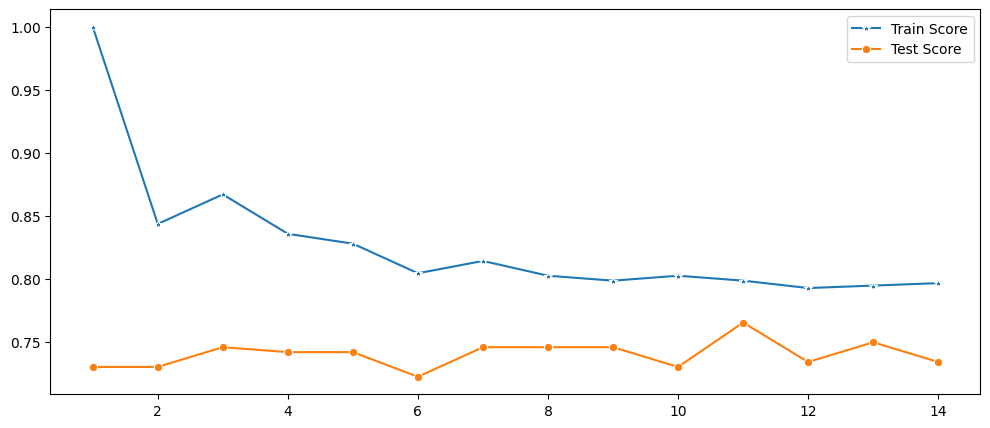

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')
plt.legend()
plt.show()


Le meilleur résultat est obtenu avec k = 11, donc 11 est utilisé pour le modèle final.

In [ ]:
# Initialisation du classificateur KNN avec k=11
knn = KNeighborsClassifier(11)
# Entraînement du modèle sur les données d'entraînement
knn.fit(X_train, y_train)
# Évaluation de la précision du modèle sur les données de test
knn.score(X_test,y_test)


0.765625

## **Analyse de la performance du modèle**
### **1. Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
# Obtention des prédictions en utilisant le classifieur que nous avions entraîné précédemment
y_pred = knn.predict(X_test)
# Calcul de la matrice de confusion
confusion_matrix(y_test, y_pred)
# Affichage de la matrice de confusion de manière plus lisible en utilisant la fonction crosstab de pandas

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Prédit'], margins=True)

Prédit,0,1,All
True,,,
0,142,25,167
1,35,54,89
All,177,79,256


Text(0.5, 23.52222222222222, 'Predicted label')

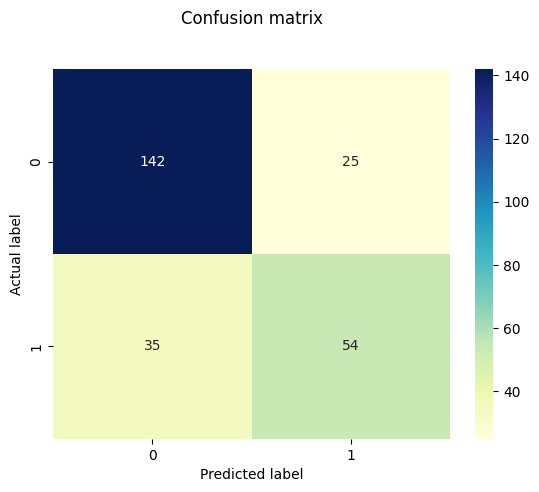

In [ ]:
# Affichage de la matrice de confusion sous forme de heatmap
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### **2. Classification Report**

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



### **3. ROC - AU**

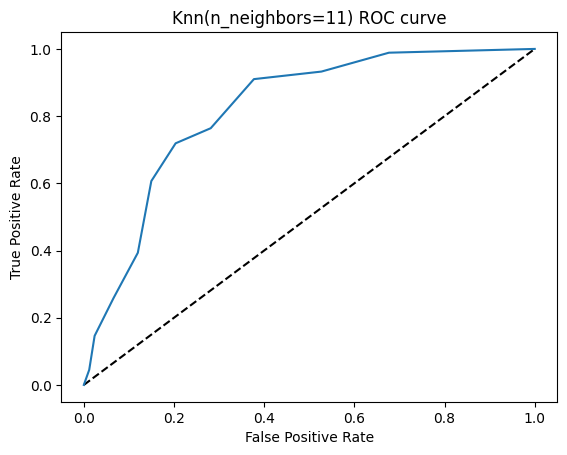

In [ ]:
#ROC (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()